<a href="https://colab.research.google.com/github/DAVOR2003/ADA/blob/main/Corte%20de%20varilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Problema de algoritmo(Corte de varillas):

**Problema: Encontrar combinación de cortes con mayor precio**.  
**Entrada:** Arreglo de precios de largo $n$ y el largo de la vara a la que se quiere sacar valor máximo.  
**Salida:** Máximo valor posible, con su configuración de cortes respectivo.

Imaginemos que tenemos una vara, y una lista de precios para cada largo posible. Lo que se quiere conseguir es encontrar la configuración con el mayor valor posible de un largo en específico.

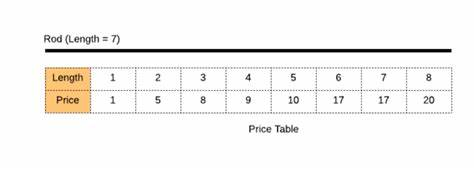

![image.png](https://homes.luddy.indiana.edu/achauhan/Teaching/B403/LectureNotes/images/07-rodcutting-example.jpg)

#2-Descripción del algoritmo:

El algoritmo CuttingRod puede solucionar la problemática presentada anteriormente. Se da un arreglo que contiene la lista de precios de largo $n$. Con esta lista de precios se debe encontrar el máximo precio posible para cada largo de la vara $i$.

Esto se hace comparando cada caso posible, contando también los cortes y la cantidad de piezas resultantes de la vara cortada.  
Si se desea calcular el precio máximo de una vara de largo $n$, entonces el número de combinaciones posibles es de $2^{n-1}$.

Analizaremos el proceso que se hace al ejecutar el siguiente ejemplo, implementando el algoritmo CuttingRod con dos distintos métodos.

Bottom-up

La variante Bottom-Up implementa el algoritmo CuttingRod con programación dinámica.  
La programación dinámica se caracteriza en resolver los problemas dados de manera más eficiente, reutilizando cálculos hechos anteriormente, para obtener los casos futuros, en base a estos resultados pasados.

Se van guardando los resultados desde el caso base, hasta el caso que se está buscando.

![image.png](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F2a1c2e63-d862-414e-8b6a-3fe2c891550c%2FUntitled.png?table=block&id=c6ce7908-9160-4d61-884b-2669d9c776b8&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=350&userId=&cache=v2)

La imagen presentada anteriormente, muestra un ejemplo de programación dinámica.

Se nos da $F_0$ inicial, y con ese valor se calcula el siguiente caso, $F_1$.  
Luego se observa que para obtener $F_2$ se usarán los valores conseguidos anteriormente, es decir, $F_0$ y $F_1$.  
Se va siguiendo esta regla hasta encontrarnos con el resultado que buscamos.  
Para $F_3$ se utiliza $F_0$, $F_1$ y $F_2$.  
Finalmente, para $F_4$, se aprovechan todos los resultados guardados de los casos pasados, utilizándolos para calcular el valor que se requiere buscar.  
Para $F_n$ se utiliza $F_0, F_1, F_2...,F_{n-1}$.  

Recursivo

La singularidad de este método es que no se molesta en guardar los resultados anteriores, lo que hace es calcular profundamente todos los casos posibles, independiente de que se hayan presentado antes.

El tiempo de ejecución de este algoritmo es increíblemente alto, el problema consiste en que los casos posibles los calcula por completo hasta el caso base.

No es recomendable usarlo, pero igualmente vale la pena estudiarlo.

El algoritmo encuentra el máximo, comparando la vara completa con todos los posibles casos.  

Se tiene la lista de precios $P$ de largo $n$.  
- La vara entera, sin cortes, tiene el precio completo de la vara $P_n$.  
- Se deben revisar todos los casos con cortes, por lo que se van a ir comprobando cortándolos con un índice $i$.  
El corte hecho se ve representado como $P_i + r_{n-i}$.
- Se compara cuál es mayor, $P_n$ o $P_i+r_{n-i}$.

El número de cortes se ve representado por $2^{n-1}$, por lo que la complejidad temporal es la misma, $O(2^{n-1})$.

![image.png](https://docs.google.com/drawings/d/e/2PACX-1vS1PepvvczFdDNgTY9wP-LyEi5-n8mfg1q1xHeb6ycteXqI0N9vmGjkGG3PI3595JDBChGJeYrVGYP7/pub?w=785&h=407)

#2.2- Ejemplo:
**Ejemplo:**  
Como se ve en esta imagen, si queremos encontrar el máximo precio posible en una vara de largo $3$, tenemos que encontrar la combinación de diferentes largos, con sus precios respectivos para conseguir los cortes de vara necesarios para la configuración con mayor precio.

Para este caso se puede cortar la vara de diferentes maneras:  
1. Sin cortes, es decir, la vara completa.
2. Un sólo corte, separando la vara, consiguiendo la primera parte de largo $1$, y la otra de largo $2$.
3. Al revés, cortando la vara en dos, una de largo $2$ y la otra pieza de largo $1$.
4. Por último, obteniendo tres piezas, de forma que se corte la vara de largo $3$, en tres mini varas de largo $1$.

Analizando las diferentes configuraciones y consiguiendo los resultados de cada caso posible con la lista de precios, se debe encontrar la combinación de cortes que contenga el mayor valor.


Codigo

#corte de varillas con bottom up

In [ ]:
#corte de varillas con bottom up
import random as rd
from termcolor import colored
import matplotlib.pyplot as plt
INTMIN = -9999999

def corteVBU(p,n):
  global r
  global contB
  global verbose

  for j in range(1,n+1):
    q = INTMIN
    if verbose: print(colored(f"VARA DE LARGO {j}","blue"))

    for i in range(j):
      if verbose:
        if j-i-1 == 0:print(colored(f"Vara completa =","red"),p[i])
        else:
          print(colored(f"Cortes {i+1} / {j-i-1} =","red"), p[i] + r[j-i-1])

      q = max(q, p[i] + r[j-i-1])
      contB += 1

    r[j] = q
    if verbose: print(colored(f"Máximo de vara de largo {j} →","yellow"),r[j],"\n")

  return r[n]




n = rd.randint(1,10)
A = []
prev = 0
for i in range(10):
  r = rd.randint(0,10)
  A.append(prev+r)
  prev+=r

r = [0]*(n+1)
verbose = False
contB = 0
print(colored(f"Lista de precios:","green"),A)
print(colored("Largo de Vara:","green"),n,"\n")
print(colored(f"Precio máximo de la vara de largo {n}:","green"), corteVBU(A,n))

Lista de precios: [7, 13, 19, 28, 30, 33, 34, 37, 40, 47]
Largo de Vara: 10 

Precio máximo de la vara de largo 10: 70


#Corte de varillas recursivo

In [ ]:
#Corte de varillas Recursivo
def corteVR(p,n):
  global cont
  cont += 1

  if n <= 0:
    return 0

  q = INTMIN
  for i in range(0,n):
    q = max(q, p[i]+corteVR(p,n-i-1))

  return q




n = rd.randint(1,10)
A = []
prev = 0
for i in range(10):
  r = rd.randint(0,10)
  A.append(prev+r)
  prev+=r


r = [0]*(n+1)
cont = 0
print(colored(f"Lista de precios:","blue"),A)
print(colored("Largo de Vara:","blue"),n,"\n")
print(colored(f"Precio máximo de la vara de largo {n}:","blue"), corteVR(A,n))
print(colored(f"Llamadas Recursivas:", "blue"), cont)

Lista de precios: [10, 20, 24, 33, 36, 44, 44, 47, 54, 62]
Largo de Vara: 6 

Precio máximo de la vara de largo 6: 60
Llamadas Recursivas: 64


#Con Verbose = True:

In [ ]:
n = rd.randint(1,10)
A = []
prev = 0
for i in range(10):
  r = rd.randint(0,10)
  A.append(prev+r)
  prev+=r


r = [0]*(n+1)
verbose = True
contB = 0
print(colored(f"Lista de precios:","green"),A)
print(colored("Largo de Vara:","green"),n,"\n")
print(colored(f"Precio máximo de la vara de largo {n}:","green"), corteV_BU(A,n))

Lista de precios: [8, 12, 19, 23, 28, 38, 44, 45, 46, 51]
Largo de Vara: 10 

VARA DE LARGO 1
Vara completa = 8
Máximo de vara de largo 1 → 8 

VARA DE LARGO 2
Cortes 1 / 1 = 16
Vara completa = 12
Máximo de vara de largo 2 → 16 

VARA DE LARGO 3
Cortes 1 / 2 = 24
Cortes 2 / 1 = 20
Vara completa = 19
Máximo de vara de largo 3 → 24 

VARA DE LARGO 4
Cortes 1 / 3 = 32
Cortes 2 / 2 = 28
Cortes 3 / 1 = 27
Vara completa = 23
Máximo de vara de largo 4 → 32 

VARA DE LARGO 5
Cortes 1 / 4 = 40
Cortes 2 / 3 = 36
Cortes 3 / 2 = 35
Cortes 4 / 1 = 31
Vara completa = 28
Máximo de vara de largo 5 → 40 

VARA DE LARGO 6
Cortes 1 / 5 = 48
Cortes 2 / 4 = 44
Cortes 3 / 3 = 43
Cortes 4 / 2 = 39
Cortes 5 / 1 = 36
Vara completa = 38
Máximo de vara de largo 6 → 48 

VARA DE LARGO 7
Cortes 1 / 6 = 56
Cortes 2 / 5 = 52
Cortes 3 / 4 = 51
Cortes 4 / 3 = 47
Cortes 5 / 2 = 44
Cortes 6 / 1 = 46
Vara completa = 44
Máximo de vara de largo 7 → 56 

VARA DE LARGO 8
Cortes 1 / 7 = 64
Cortes 2 / 6 = 60
Cortes 3 / 5 = 59


#3-Complejidad Temporal:

**Hipótesis**  
Complejidad Temporal $→ O(n^2)$  

Si consideramos $n$ como el largo de la vara a la cuál queremos buscar el valor máximo posible, debemos comparar los precios de las combinaciones posibles para cada largo desde $1$ a $n$.

Esto nos da lo siguiente:  
- $\sum\limits_{j=1}^{n}\sum\limits_{i=0}^{j}C$
- $C \cdot \sum\limits_{j=1}^{n}j$
- $C \cdot (n(n+1))/2$
- $C \cdot (n^2 + n)/2$

Si lo extrapolamos al tiempo de ejecución de un algoritmo, debemos eliminar constantes, y quedarnos con el polinomio de mayor grado.  
Haciendo esto, nos encontramos que el tiempo de ejecución es efectivamente el que pensabamos.

**Tiempo de ejecución $→ O(n^2)$**

###**Complejidad Espacial**
Al estar analizando la variante implementada con programación dinámica, sabemos que este método va almacenando los resultados de los subproblemas, esto quiere decir que necesitamos utilizar memoria adicional para que Cutting Rod funcione correctamente.  
Si estamos buscando el valor máximo de una vara de largo $n$, entonces se necesita guardar el precio de cada largo a calcular, en resumen, se deben almacenar $n$ resultados, es por esto que se necesita un arreglo auxiliar de largo $n$.

**Memoria adicional necesaria** → $O(n)$

#4-Correctitud(Botton up):


Probaremos que el algoritmo corte de varillas botton up es correcto y utilizxaremos el metodo de bucle invartiante \


El algoritmo corte de varillas recibe una lista de precios  [a1≤a2≤...≤an]  y un índice  i , con  1≤i≤n , y retorna el valor máximo posible para la vara de largo  i .

A fin de probar si es correcto el algoritmo, es necesario estudiar lo que ocurre en dos casos específicos:

Caso Base: Cuando  i = 1. \
Caso General: Cuando  1 < i.

Caso Base: \
sabemos que el largo a calcular es de largo único y ya que es el único elemento se retorna al valor del elemento q sera el valor máximo.

Caso General: \
Mantención:lo que se sabe es que cada vez que ocurre una iteración, lo que sucede es que este guarda el valor máximo de esa iteración, con esto en cuenta se deduce que despues de cada iteración siempre se guarda el valor máximo de esta iteración por lo que no cambia. \
inicialización:al comienzo de cada iteración se evalua un caso diferente al anterior y asi siempre se veran todas combinaciones existentes en el problema. \
con todo esto en cuenta se deduce que el algoritmo conocido como el corte de varillas es correcto.

#5-Experimentos:

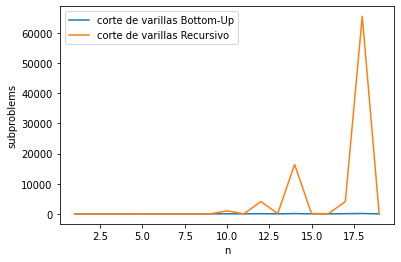

In [ ]:
x=[]; y=[]; y2=[]
verbose = False
for n in range(1,20):
  contB = 0
  cont = 0


  A = []
  prev = 0
  for i in range(n):
    b = rd.randint(0,10)
    A.append(prev+b)
    prev+=b 

  r = [0]*(n+1)
  i = rd.randint(1,n)
  corteVBU(A,i)
  corteVR(A,i)

  y.append(contB)
  y2.append(cont)
  x.append(n)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["corte de varillas Bottom-Up","corte de varillas Recursivo"])

plt.xlabel('n')
plt.ylabel('subproblems')
plt.show()

*análisis*: \
como podemos analizar en el siguiende gráfico el algoritmo recuresivo es sumamente inestable en cambio el incorporado con el bottom up es mas estable y no tiene picks tan abismnales como el recursivo.


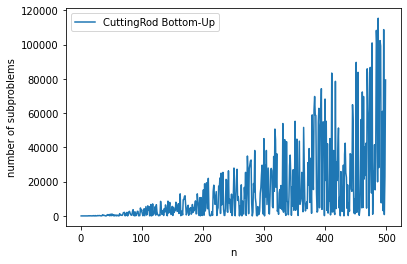

In [ ]:
x=[]; y=[]

verbose = False
for n in range(1,500):
  contB = 0
  A = []
  prev = 0
  for i in range(n):
    b = rd.randint(0,10)
    A.append(prev+b)
    prev+=b
  r = [0]*(n+1)
  i = rd.randint(1,n)
  corteVBU(A,i)

  y.append(contB)
  x.append(n)

plt.plot(x,y)

plt.legend(["CuttingRod Bottom-Up"])

plt.xlabel('n')
plt.ylabel('number of subproblems')
plt.show()

*análisis*: \
Calculamos anteriormente que el tiempo de ejecución del algoritmo corte de varilla implementado con programación dinámica (Bottom-Up) es de $O(n^2)$.  
En el gráfico se ve que hay muchos casos en los que el tiempo de ejecución es cercano a $0$. Esto es porque estos casos son cuando se buscan resultados en varas de largo $1$, pero si observamos los valores máximos ($i = n$) que se muestran en el gráfico, podemos darnos cuenta de como crece el tiempo de ejecución del algoritmo en función del largo de la lista de precios, y crecerá de forma potencial, específicamente $i^2$.